#### Набор данных состоит из спектров одного и того же вещества, записанных при различных температурах.
#### Необходимо найти температуру, при которой структура этого вещества (и значит и его спектр) изменится.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('txt/bsn300K.txt', sep='\t', header=-1, names=['Wavenumber', 'Intensity'])

#### Спектр представляет собой таблицу с двумя колонками
#### Первая колонка - 'Wavenumber', это спектральный диапазон, он всегда одинаков, не изменяется при разных температурах. Думаю, что его можно неучитывать и удалить из датасета.

In [3]:
df.head()

,Wavenumber,Intensity
0,988.543,2453.01
1,986.950,2445.16
2,985.357,2502.51
3,983.763,2493.94
4,982.169,2519.88


#### В каждой колонке датасета по 551 строк, т.е. 551 различных значений.

In [4]:
len(df)

551

#### Спектр выглядит вот так

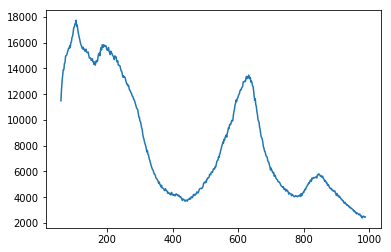

In [5]:
plt.plot(df['Wavenumber'].values, df['Intensity'].values)
plt.show()

#### Объединяем все спектры в один датафрейм

In [6]:
df = pd.read_csv('txt/spectra.csv')

#### Теперь у нас в одной таблице все спектры, снятые при разных температурах. У них одниковый столбек с волновыми числами "Wavenumber", но разные интенсивности при разных температурах.

In [7]:
df.head()

,Wavenumber,300K,310K,320K,330K,340K,350K,360K,370K,380K,...,610K,620K,630K,640K,650K,660K,670K,680K,690K,700K
0,988.543,2453.01,3940.82,4082.07,4499.54,3779.17,3921.99,4435.19,4421.06,3939.25,...,2066.93,1878.60,1971.20,1975.90,1721.66,1839.36,1756.18,1727.93,2774.74,2335.30
1,986.950,2445.16,3964.36,4204.48,4518.37,3699.13,3958.08,4507.38,4504.24,3917.28,...,2131.28,1902.14,1958.64,1996.31,1796.99,1869.18,1790.71,1632.20,2679.01,2333.73
2,985.357,2502.51,3945.96,4261.32,4593.94,3767.09,3930.27,4479.41,4504.51,3989.89,...,2160.47,1921.99,2061.62,1959.64,1771.37,1857.66,1788.62,1680.37,2725.30,2342.47
3,983.763,2493.94,3957.37,4314.99,4534.58,3824.04,3973.05,4586.34,4490.66,3958.94,...,2104.95,1913.59,2158.28,2045.35,1792.81,1805.36,1806.93,1645.37,2721.38,2357.48
4,982.169,2519.88,4056.59,4301.21,4544.26,3832.35,3924.87,4514.46,4454.88,4014.25,...,2179.61,1894.22,2027.51,2060.44,1789.16,1919.31,1840.91,1690.38,2731.57,2402.28


#### Транспонируем таблицу

In [8]:
data = df.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,541,542,543,544,545,546,547,548,549,550
Wavenumber,988.543,986.95,985.357,983.763,982.169,980.574,978.979,977.383,975.787,974.19,...,75.0761,73.2938,71.5112,69.7283,67.9451,66.1617,64.378,62.594,60.8098,59.0254
300K,2453.010,2445.16,2502.510,2493.940,2519.880,2462.730,2388.370,2519.300,2491.960,2593.05,...,15000.8000,14963.4000,14450.6000,14379.7000,13893.9000,13898.8000,13431.400,13031.400,12352.8000,11486.6000
310K,3940.820,3964.36,3945.960,3957.370,4056.590,4064.840,4107.560,4092.300,4167.890,4136.97,...,27403.4000,27197.2000,26608.3000,25935.4000,25686.1000,25523.9000,24826.300,23944.000,22694.9000,21048.2000
320K,4082.070,4204.48,4261.320,4314.990,4301.210,4317.220,4287.790,4466.750,4340.180,4434.48,...,28128.7000,28180.5000,27389.4000,27242.3000,26725.0000,26569.6000,25867.700,24818.500,23573.4000,21957.5000
330K,4499.540,4518.37,4593.940,4534.580,4544.260,4663.670,4649.800,4524.710,4736.450,4638.04,...,28837.1000,28639.2000,28120.1000,28040.1000,27147.0000,27248.1000,26369.500,25803.600,24296.4000,22657.9000


#### Удалим строку с волновыми числами

In [9]:
data = data.drop(index = 'Wavenumber')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,541,542,543,544,545,546,547,548,549,550
300K,2453.01,2445.16,2502.51,2493.94,2519.88,2462.73,2388.37,2519.30,2491.96,2593.05,...,15000.8,14963.4,14450.6,14379.7,13893.9,13898.8,13431.4,13031.4,12352.8,11486.6
310K,3940.82,3964.36,3945.96,3957.37,4056.59,4064.84,4107.56,4092.30,4167.89,4136.97,...,27403.4,27197.2,26608.3,25935.4,25686.1,25523.9,24826.3,23944.0,22694.9,21048.2
320K,4082.07,4204.48,4261.32,4314.99,4301.21,4317.22,4287.79,4466.75,4340.18,4434.48,...,28128.7,28180.5,27389.4,27242.3,26725.0,26569.6,25867.7,24818.5,23573.4,21957.5
330K,4499.54,4518.37,4593.94,4534.58,4544.26,4663.67,4649.80,4524.71,4736.45,4638.04,...,28837.1,28639.2,28120.1,28040.1,27147.0,27248.1,26369.5,25803.6,24296.4,22657.9
340K,3779.17,3699.13,3767.09,3824.04,3832.35,3771.69,3833.31,3847.89,3970.54,4019.53,...,23485.2,23208.1,22761.4,22682.2,22221.8,22247.9,21215.8,20872.2,19954.2,18647.0


### Теперь у нас есть метка - температура, и признаки - строка с интенсивностью, 550 фич для каждой метки.

### Задача - классифировать эти спектры на два (предположительно) класса и определить температуру (или диапазон температур), которые эти классы разделяют. Например, есть фазовый переход происходит при температуре Tc = 355 K, по спектры до этой температуры можно отнести к классу 0, спектры выше этой температуры к классу 1.

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans=KMeans(n_clusters=4)

In [12]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
cluster_centers = kmeans.cluster_centers_

In [22]:
cluster_centers.shape

(4, 551)

In [15]:
k_means_labels = kmeans.labels_
k_means_labels

array([2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [16]:
kdf=pd.DataFrame()

In [17]:
kdf['Temperature'] = range(300, 710, 10)

In [18]:
kdf['Class'] = k_means_labels

In [19]:
kdf.head()

,Temperature,Class
0,300,2
1,310,3
2,320,3
3,330,3
4,340,0
